# Выпускной проект: Анализ оттока клиентов

## Декомпозиция

Ссылка на презентацию:  
https://disk.yandex.ru/i/_5Qve9UfebXAvA

__Описание проекта:__  
Наш банк в срочном порядке ищет аналитиков уверенным владением «Python». Вашей главной задачей станет анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а так же поможет нам составить сегменты клиентов, которые склонны уходить из банка.
«Метанпромбанк» — деньги не пахнут!

__Цель проекта:__  
Понять главные причины ухода клиентов и дать рекоментации по уменьшению оттока

__Задачи проекта:__  
1. __Загрузка данных__  
    - подключение библиотек
    - загрузка исходных данных
      
      
2. __Предобработка данных__    
    - вывод общей информации о датасете
    - преведение названий столбцов к одному стилю
    - преведение типов столбцов к более походящим
    - заполнение пропусков
    - проверка на дубликаты

3. __Исследовательский анализ данных(EDA):__
    - построение корреляционной матрицы
    - анализ распределения параметров клиентов банка в разрере параметра оттока
        - построение различных визуализаций с указанием доли ушедних клиентов в каждой группе
    - анализ распределения параметров клиентов на основе города и пола
        - группировка клиентов в рамках одного города и пола для лучшего анализа оттока в каждой из групп

4. __Проверка статистичеких гипотез__
    - баланс на счету ушедшего клиента не более 800000 рублей
    - ушедшие клиенты моложе оставшихся
    - кол-во баллов собственности у оставшихся клиентов больше чем у ушедших
    - доход ушедших клиентов в среднем меньше чем у оставшихся

5. __Подвередение промежуточных итогов__
    - выводы по результатам EDA
    - выводы по результатам корреляционного анализа
    - выводы на основе проверки гипотез
    - выделение признаков, влияющих на отток

6. __Сегментация клиентов__ 
    - стандартизация данных
    - обоснование 
        - для инструмента кластеризации
        - метрики кластеризации
        - критерия кластеризации
        - количества кластеров
    -  кластеризация данных
    - анализ кластеров
        - визуализация распределения параметров 
        - вывод средних значений      
    - пример применения кластеризации для новых клентов банка

7. __Приоритизация сегментов__
    - обоснование приоритизации
    - список сементов по приоритету

8. __Выводы и рекомендации__

## Загрузка данных

In [2]:
# подключаем библиотеки
import pandas as pd
from pandas.api.types import is_string_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats as st

import phik

from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
# подгружаем исходные данные
try:
    data = pd.read_csv('bank_scrooge.csv')
except:
    data = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
data_ish = data.copy()

## Предоботка данных
    - вывод общей информации о датасете
    - преведение названий столбцов к одному стилю
    - заполнение пропусков
    - преведение типов столбцов к более походящим
    - проверка на дубликаты

### Вывод общей информации о датасете

In [5]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


В целом, почти все ячейки датасета ненулевые  
Пропуски замечены в стобцах
 - age (незначительное кол-во)
 - balance (25% от общего числа строк)

### Приведение название столбцов к единому стилю

In [6]:
# приведем название столбцов к единому стилю
data.columns = [i.lower() for i in data.columns]
data = data.rename(columns={'userid':'user_id'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Названия столбцов приведены к единому удобному стилю

### Заполнение пропусков

#### Пропуски в age

Для правильной классификации пропусков добавим стробец с наличием или отсутствием пропуска и узнаем корреляцию с другими признаками  

In [7]:
data['age_is_none'] = data['age'].isna().apply(lambda x: 1 if x == True else 0)

In [8]:
data_corr_age = data.copy()
data_corr_age = data_corr_age.drop(columns='user_id')

phik_list = ['balance','est_salary','age','score']
data_phik_age = data_corr_age.phik_matrix(interval_cols=phik_list);

data_phik_age['age_is_none'].sort_values(ascending=False)

age_is_none      1.000000
score            0.059585
products         0.044816
equity           0.038201
last_activity    0.032798
churn            0.020515
city             0.011859
est_salary       0.009403
gender           0.000000
balance          0.000000
credit_card      0.000000
age                   NaN
Name: age_is_none, dtype: float64

Корреляция между пропуском в age и другими параметрами крайне мала  
Основываясь на этом, можно утверждать, что пропуски __совершенно случайны__  
Узнаем долю таких пропусков в датасете

In [9]:
# найдем долю пропусков в age
a = data_ish['age'].isna().sum()
a_dol = round((1 - (len(data_ish) - a)/len(data_ish)) *100,2)
print(f'Доля пропусков в age составляет {a_dol} %')

Доля пропусков в age составляет 0.26 %


Доля пропусков крайне мала - удаляем пропущенные значения

In [10]:
data = data.dropna(subset=['age'])

#### Пропуски в balance

Также для классификации пропусков определим корреляцию между их появлением и другими параметрами датасета

In [11]:
# Создадим новый столбец, включающий в себя значение 0 если нет пропуска и 1 если пропуск есть
data['is_none'] = data['balance'].isna().apply(lambda x: 1 if x == True else 0)
# Проверим зависимость пропусков от признаков
data_corr_bal = data.copy()
data_corr_bal = data_corr_bal.drop(columns='user_id')

data_phik_bal = data_corr_bal.phik_matrix(interval_cols=phik_list);

data_phik_bal['is_none'].sort_values(ascending=False)

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable age_is_none for analysis 1. Dropping this column
  warnings.warn(


is_none          1.000000
equity           0.975565
products         0.791714
score            0.754146
est_salary       0.429668
churn            0.380486
credit_card      0.244231
gender           0.096927
age              0.047756
last_activity    0.041335
city             0.039951
balance               NaN
Name: is_none, dtype: float64

В ходе анализа можем заметить, что вероятность пропуска имеет самую высокую кореляцию с количеством баллов собственности equity. Посмотрим подробнее:

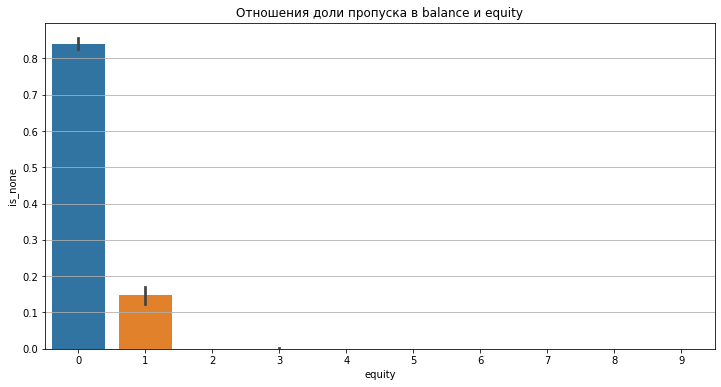

In [12]:
# построим countplot
plt.figure(figsize=(12,6))
plt.grid(True)
plt.title('Отношения доли пропуска в balance и equity')
plt.xlabel('equity')
plt.ylabel('доля пропуска в balance')
sns.barplot(x=data['equity'],y=data['is_none']);

In [13]:
# найдем количество пропусков при equity = 0
data[data['equity']==0]['balance'].isna().sum()

2164

Пропуски в столбце balance сильно зависят от equity!

Примечательно, что основная маcса пропусков(> 2000) в графе баланс находится именно в группе с нулевыми баллами собственности(и малая часть с 1). Данную группу пропусков можно классифицировать __как пропущенные не случайно__. 

Они могли появится при нулевом балансе клиента банка.

Также удалим технический столбец is_none за безнадобностью

In [14]:
data=data.drop(['is_none','age_is_none'],axis=1)

In [15]:
# проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.2+ MB


Проблема пропусков в данных решена!

### Изменение типов столбцов

In [16]:
# выведем первые 10 строк датасета
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Так как и __score__, и __age__ выражает значения в целых числах, изменим их тип на __int__


In [17]:
data['score'] = data['score'].astype('int')
data['age'] = data['age'].astype('int')

In [18]:
# проверим
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


Типы данных приведены в порядок!

### Проверка на дубликаты

In [19]:
# проверим явные дубликаты
data.duplicated().sum()

0

Явных полноценных строк дубликатов не обнаружено

In [20]:
# проверим дубликаты по userid
data[data.duplicated(subset=['user_id'],keep=False)].sort_values(by=['user_id','churn']).head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


При анализе дубликатов можно заметить некую закономерность - клиенты с одинаковыми id всегда идут в паре со следующими параметрами:
 - клиенты отличаются городами
 - один из клиентов имеет значения критерия оттока = 1 - клиент ушел

Поэтому в данном случае удаление дубликатов будет ошибкой, немного изменим id для ушедных клиентов в каждой паре

In [21]:
# функция для модифицирования userid
def mod_id(x,id_list):
    if (x['user_id'] in id_list) and (x['churn'] == 1):
        x['user_id'] = x['user_id'] + 100000
    return(x['user_id'])

# список id  с дублем
id_list = list(data[data.duplicated(subset=['user_id'],keep=False)]['user_id'].unique())

In [22]:
# модифицируем
data['user_id'] = data.apply(lambda x: mod_id(x,id_list), axis=1)
# проверяем
data['user_id'].duplicated().sum()

0

In [23]:
# проверка неявных дубликатов в городах
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

С дубликатами покончено!

### Выводы по блоку 'Предобработка данных'

В ходе блока 'Предобработка данных' были решены следующие задачи:  
- была выведена общая информация о датасете, сформулированы задачи по предобработке
- названия столбцов были приведены к удобной форме записи
- был произведен анализ пропущенных значений
    - при наличии пропусков в age строки удалялись в связи с малым количеством
    - при наличии пропусков в balance значения заменялись заглушкой '-1'
-  score, и age выражает значения в целых числах, изменили их тип на int
-  была произведена проверка на дубликаты:
    - дубликаты по столбцу обоснованы передачей id ушедшего клиента новому
    - id ушедних клиентов в таком случае модифицировались, а не удалялись  

## Исследовательский анализ данных(EDA):
    - построение корреляционной матрицы
    - анализ распределения параметров клиентов на основе города и пола в разрезе параметра оттока
        - группировка клиентов в рамках одного города и пола для лучшего анализа оттока в каждой из групп

### Построение матрицы корреляции
Для построения наиболее полной матрицы корреляции воспользуемся библиотекой phik

In [24]:
# удаляем из исходной таблицы user_id за ненадобностью
data = data.drop('user_id', axis=1)

В phik_matrix необходимо в явном виде передать список именно непрерывных переменных, а именно:
- balance
- est_salary

In [25]:
# создаем матрицу корреляции с помощью phik
phik_list = ['balance','est_salary','age','score']
data_phik = data.phik_matrix(interval_cols=phik_list);

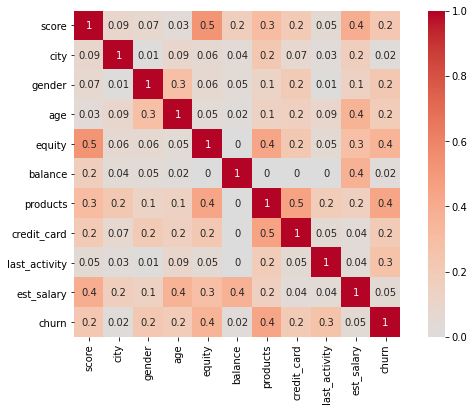

In [26]:
# визуализирем матрицу с помощью seaborn
plt.figure(figsize=(10,6))
sns.heatmap(data_phik, \
            cmap='coolwarm', annot = True, fmt='.1g', center=0, \
            square=True
);

Отдельно выведем столбец с корреляциями churn

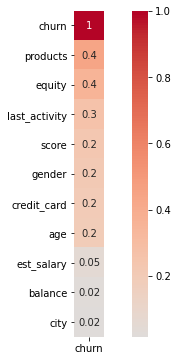

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(data_phik[['churn']].sort_values('churn',ascending=False), \
            cmap='coolwarm', annot = True, fmt='.1g', center=0,square=True);

Сделаем выводы из анализа матрицы корреляции:  
Отток имеет следующую корреляцию(по шкале Чеддока) 

__Слабая корреляция__
-  с количеством баллов собственности(0.4)
-  с количеством продуктов банка(0.4)
-  со статусом активности(0.3)

__Очень слабая корреляция__
- рейтинг банковского скоринга(0.2)
- пол (0.2)
- возраст (0.2)
- наличие кредитной карты (0.2)
- зарплата(0.05)
- город (0.02)
- баланс (0.02)

В целом, отток довольно плохо коррелируется с остальными параметрами, но лучше остальных это получилось у группы слабой корреляции

### Анализ распределения параметров
Для лучшего анализа разделим исходный датасет на 6 датасетов, отличающихся значением города и пола

In [28]:
    
# рассчитаем среднее значение оттока по всему банку
mean_churn = data['churn'].mean().round(2)
mean_churn
# функция для визуализации распределения величин
def rasp_val(label,data,hue='churn',hue_1='churn',mean_churn=mean_churn,gr=True):
    sns.set_style("darkgrid")
    viz=data.columns
    if gr:
        fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    else:
        fig, axs = plt.subplots(5, 2, figsize=(15, 12))
        
    fig.suptitle(label,size=14)

    
    for ax,x in zip(axs.flat,viz):
        ax.grid(True)
        if is_string_dtype(data[x]) or x in ['credit_card','last_activity','equity','products','is_none','city','gender', \
                                            'churn']:
            sns.barplot(data=data,x=x,y=hue_1,ax=ax,color='skyblue')
            
            ax.axhline(mean_churn,color='r',ls='--')
            
            bbox_g=dict(facecolor='None', edgecolor='orange',pad=0.5)
            bbox_r=dict(facecolor='None', edgecolor='red',pad=0.5)
            
            ax.text(0, mean_churn, f'Средняя по банку: {mean_churn:.2f}', ha='left', va='bottom', c='black', \
                       bbox = bbox_r)
            
            ax.set_ylabel('Доли оттока')
            
        elif x == 'balance':
            data_b = data.copy().query('balance >= 0')
            ax.set_xlim(np.percentile(np.array(data_b[x]),0),np.percentile(np.array(data_b[x]),98))
            sns.histplot(data=data_b,x=x,ax=ax,hue=hue,kde=True,stat="density", common_norm=False)
            ax.set_ylabel('Плотность распределения')
        else:
            ax.set_xlim(np.percentile(np.array(data[x]),1),np.percentile(np.array(data[x]),97))
            sns.histplot(data=data, x=x,kde=True,ax=ax,stat="density", common_norm=False, hue=hue)
            ax.set_ylabel('Плотность распределения')
            
        ax.set_xlabel('')
        ax.set_title(x)
    plt.tight_layout()
    plt.show()

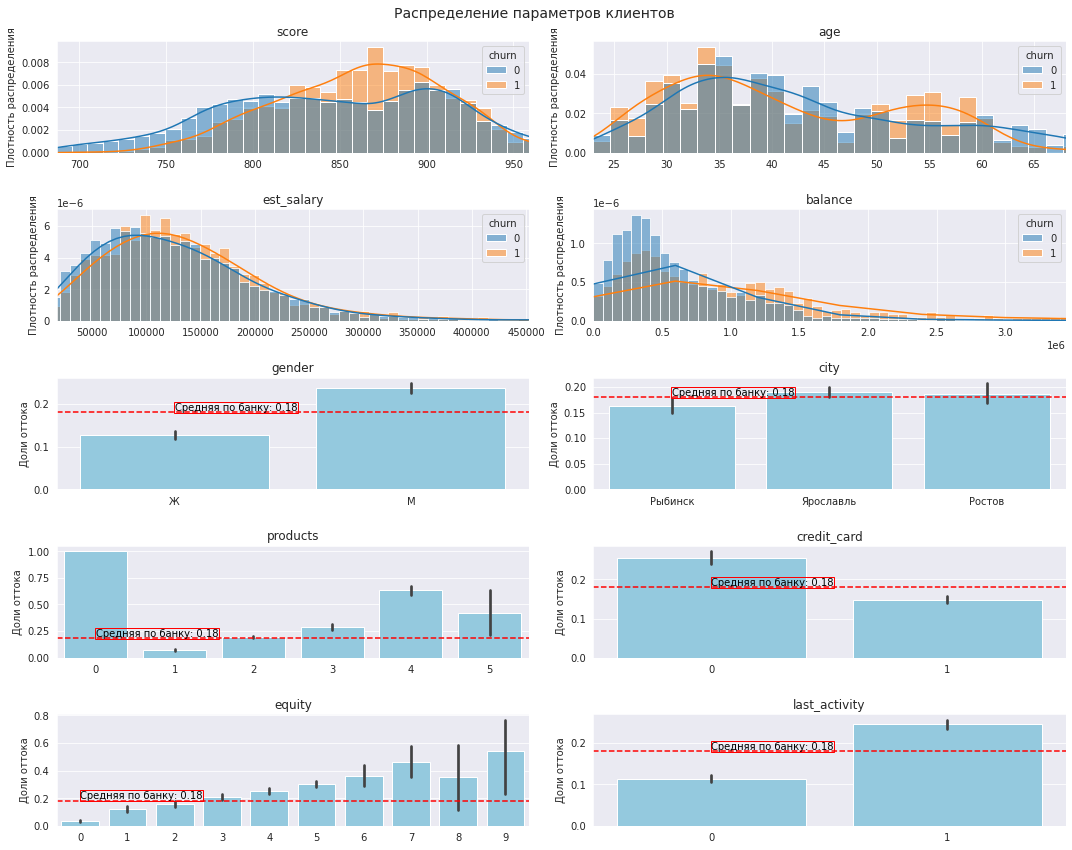

In [29]:
# подготовим общую таблицу
# немного изменим порядок столбцов
data_new =data[data.columns[[0, 3, 9, 5, 2, 1, 6, 7, 4, 8,10]]]
# построим графики
rasp_val('Распределение параметров клиентов ',data_new,gr=False)

Анализируя все вышеописанные результаты, можно сделать следующие выводы по интервалам оттока:
1. __Кредитный рейтинг(score):__  
    - с 820 до 930 заметен явный перевес оттока
2. __Возраст (age):__
    - c 25 до 35
    - с 50 до 60
3. __Пол(gender):__
    - Чаще уходят мужчины(но этот показатель имеет минимальную важность)
4. __Баланс(balance):__
    - c 800 тыс
5. __Уровень предпологаемой зп(est_salary):__
    - со 100 тыс
6. __Город(city):__
    - Нет определенного лидера в оттоке
7. __Количество продуктов (products):__
    - менее 1
    - начиная с 2 и более
8. __Наличие кредитной карты (credit_card):__
    - чаще уходят клиенты без нее
9. __Количество баллов собственности(equity):__
    - начиная с 4
10. __Активность клиента(last_activity):__
    - активные клиенты уходят чаще

### Создание портрета клиента

Создадим 4 отточных(на основе признаков с относительно высоким коэффициентом оттока) портрета и 1 лояльный портреты

Отточные признаки и интервалы для портретов
- __Количество продуктов (products):__
    - менее 1
    - начиная с 2 и более
- __Количество баллов собственности(equity):__
    - начиная с 4
- __Активность клиента(last_activity):__
    - активные клиенты 

In [30]:
# функция для расчета среднего и медианы
def medan(a):
    return(a.mean(),a.median())

# функция для портретов
def port(label,data=data):
    new_list = []
    new_index_list = []
    
    new_list_bot = []
    new_index_list_bot = []
    
    for name in data.select_dtypes(exclude='object').columns:
        v1,v2=medan(data[name])
        new_list.append(v1)
        new_list.append(v2)
        new_index_list.append(f'среднее {name}')
        new_index_list.append(f'медиана {name}')
    
    for name in data.select_dtypes(include='object').columns:
        new_list_bot.append(stat.mode(data[name]))
        new_index_list_bot.append(f'мода {name}')
    
    
    d = {label: new_list}
    data_port = pd.DataFrame(data=d)
    data_port.index = new_index_list
    
    d_bot = {label: new_list_bot}
    data_port_bot = pd.DataFrame(data=d_bot)
    data_port_bot.index = new_index_list_bot

    return(data_port,data_port_bot)

def mer(b,a):
    for i in a:
        b = b.join(i)
    return(b)

In [31]:
# функция для добавления столбцов относительной разницы
def otn_raz(data):
    b = 'Лояльные'
    for column in data_grport.columns:
#         print(1)
        for index in data_grport[column].index:
#             print(index)
            if 'среднее' in index: 
#                 print(3)
                data_grport.loc[index,f'Отн разница между {column} и {b}'] =  \
                        ((data_grport.loc[index,b] - data_grport.loc[index,column])/data_grport.loc[index,b])
    return(data_grport.round(2).fillna('-'))

In [32]:
# подготовим данные для создания портретов
data_pr0 = data.query('products == 0')
data_pr1 = data.query('products >= 2')
data_eq = data.query('equity >= 4')
data_ac = data.query('last_activity == 1')
data_l = data.query('churn == 0')

data_pr0,data_pr0_bot = port('products = 0',data=data_pr0)
data_pr1,data_pr1_bot = port('products >= 2',data=data_pr1)
data_eq,data_eq_bot = port('equity >= 4',data=data_eq)
data_ac,data_ac_bot = port('last_activity = 1',data=data_ac)
data_l,data_l_bot = port('Лояльные',data=data_l)




data_grport = mer(data_pr0,[data_pr1,data_eq,data_ac,data_l])
data_grport_bot = mer(data_pr0_bot,[data_pr1_bot,data_eq_bot,data_ac_bot,data_l_bot])

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [33]:
# создаем таблицу с портретами
data_grport = otn_raz(data_grport)
data_grport = data_grport.drop(columns='Отн разница между Лояльные и Лояльные')
data_grport = pd.concat([data_grport, data_grport_bot]).fillna('-')

/tmp/ipykernel_181/2126317743.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  ((data_grport.loc[index,b] - data_grport.loc[index,column])/data_grport.loc[index,b])
/tmp/ipykernel_181/2126317743.py:11: RuntimeWarning: invalid value encountered in double_scalars
  ((data_grport.loc[index,b] - data_grport.loc[index,column])/data_grport.loc[index,b])


In [34]:
# выведем таблицу
data_grport

,products = 0,products >= 2,equity >= 4,last_activity = 1,Лояльные,Отн разница между products = 0 и Лояльные,Отн разница между products >= 2 и Лояльные,Отн разница между equity >= 4 и Лояльные,Отн разница между last_activity = 1 и Лояльные
среднее score,962.0,845.86,859.15,846.79,845.4,-0.14,-0.0,-0.02,-0.0
медиана score,962.0,845.0,860.0,850.0,848.0,-,-,-,-
среднее age,79.0,43.0,42.77,42.64,43.02,-0.84,0.0,0.01,0.01
медиана age,79.0,40.0,40.0,40.0,40.0,-,-,-,-
среднее equity,3.0,3.28,4.65,2.63,2.38,-0.26,-0.38,-0.95,-0.1
медиана equity,3.0,4.0,5.0,3.0,3.0,-,-,-,-
среднее balance,-,874875.86,1113818.36,874831.7,733031.63,-,-0.19,-0.52,-0.19
медиана balance,-,554493.84,743148.73,535431.94,475410.09,-,-,-,-
среднее products,0.0,2.31,2.17,1.9,1.76,1.0,-0.31,-0.23,-0.08
медиана products,0.0,2.0,2.0,2.0,2.0,-,-,-,-


Основные особенности различных групп пользователей
- __products = 0__
    - Медианный возраст =79 - пожилые люди
    - с довольно маленькой зарплатой(пенсией)
    - с нулевым балансом
    - доля ушедших = 1(скорее всего по естественным причинам)
    
    
- __products >=2__
    - в среднем на 40 процентов относительно лояльных больше баллов собственности
    - в среднем на 30 процентов относительно лояльных больше продуктов банка
    - доля ушедших = 0.24
    
    
- __equity >=4__
    - в среднем на 95% больше баллов собственности
    - на 50% больше баланс
    - доля ушедших = 0.28
    
    
- __last_activity = 1__
    - баланс на 20% больше
    - на 10% больше баллов собственности
    - доля ушедших = 0.24

### Выводы по блоку 'Исследовательский анализ данных'

В ходе блока 'Исследовательский анализ данных' были решены следующие задачи и сделаны выводу:
- Построение матрицы корреляции
    - Отток имеет следующую корреляцию(по шкале Чеддока)  
        __Слабая корреляция__
        -  с количеством баллов собственности(0.4)
        -  с количеством продуктов банка(0.4)
        -  со статусом активности(0.3)
***
- Анализ распределения параметров клиента в разрезе оттока
     - выводы по интервалам оттока:
        1. Кредитный рейтинг(score):
            - с 820 до 930 заметен явный перевес оттока
        2. Возраст (age):
            - c 25 до 35
            - с 50 до 60
        3. Пол(gender):
            - Чаще уходят мужчины(но этот показатель имеет минимальную важность)
        4. Баланс(balance):
            - c 800 тыс
        5. Уровень предпологаемой зп(est_salary):
            - со 100 тыс
        6. Город(city):
            - Нет определенного лидера в оттоке
        7. Количество продуктов (products):
            - 0
            - начиная с 2 и более
        8. Наличие кредитной карты (credit_card):
            - чаще уходят клиенты без нее
        9. Количество баллов собственности(equity):
            - начиная с 3
        10. Активность клиента(last_activity):
            - активные клиенты уходят чаще
           
***
- Построение портрета пользователя
    - таблица портрета включает в себя 5 стобца с 4 портретами оттока(признаки в названиях группы) и 1 полностью лояльным портретом  
    
    Основные особенности различных групп пользователей
- __products = 0__
    - Медианный возраст =79 - пожилые люди
    - с довольно маленькой зарплатой(пенсией)
    - с нулевым балансом
    - доля ушедших = 1(скорее всего по естественным причинам)
    
    
- __products >=2__
    - в среднем на 40 процентов относительно лояльных больше баллов собственности
    - в среднем на 30 процентов относительно лояльных больше продуктов банка
    - доля ушедших = 0.24
    
    
- __equity >=4__
    - в среднем на 95% больше баллов собственности
    - на 50% больше баланс
    - доля ушедших = 0.28
    
    
- __last_activity = 1__
    - баланс на 20% больше
    - на 10% больше баллов собственности
    - доля ушедших = 0.24

Выводы по портретам:
- __products = 0__  
    Отток в данной группе связан со смертью клиента. 
    
    
- __products >=2__  
    Это люди среднего достатка, владеющими собственностью и пользуюшиеся продуктами банка в большем количестве относительно лояльных клиентов. Есть вероятность, что их __не устраивает именно качество или наполненность продуктов.__


- __equity >=4__  
    Крупные владельцы собственности, с внушительным балансом на счету. Имеют самый большой процент оттока среди всех групп. Можно предположить, что __не устраивают условия связанные с вкладами или страхованием собственности__
    
    
- __last_activity = 1__  
    Супер активные клиенты с чуть большим относительно лояльных балансом. Чаще всего контактируют с продуктами банка, возможно __не устраивает качество обслуживания__

## Проверка статистических гипотез
    - баланс на счету ушедшего клиента не более 800000 рублей

    - ушедшие клиенты моложе оставшихся
    - кол-во баллов собственности у оставшихся клиентов больше чем у ушедших
    - доход ушедших клиентов в среднем меньше чем у оставшихся

### Первая гипотеза
Описание: баланс на счету ушедшего клиента не более 800000 рублей  
H0 - баланс на счету ушедшего клиента >= 800001  
H1 - баланс на счету ушедшего клиента < 800001 

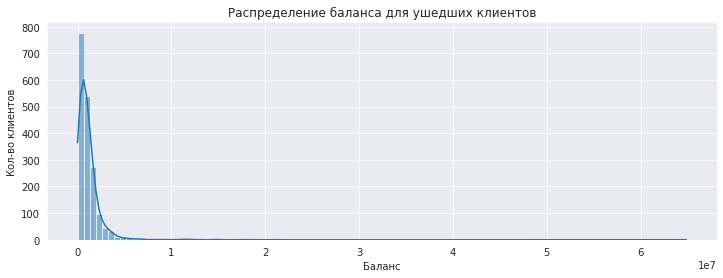

In [35]:
# подготовим выборку для проверки гипотезы
data_g1 = data.query('churn == 1 and balance >=0')
# посмотрим на распределение
plt.figure(figsize=(12,4))
plt.title('Распределение баланса для ушедших клиентов')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Баланс')
sns.histplot(data_g1['balance'], kde=True, bins=100);

Выборка содержит явные выбросы -> не можем воспользоваться t-тестом 
В таком случае нам подойдет непараметрический тест Уилкоксона-Манна-Уитни

In [36]:
# создадим 2 массива
data_g1_0 = data_g1.query('balance < 800001')['balance']
data_g1_1 = data_g1.query('balance >= 800001')['balance']

# зададим уровень статистической значимости
alpha = .05
# Проверим гипотезу
results = st.mannwhitneyu(data_g1_1, data_g1_0, alternative='less')

In [37]:
# выведем итоги проверки
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.0
Не отвергаем нулевую гипотезу


С высокой вероятностью баланс ушедшего клиента более 800 тыс

### Вторая гипотеза
Описание: ушедшие клиенты моложе оставшихся  
H0 - возраст ушедших и оставшихся клиентов равны  
H1 - возраст ушедших меньше возраста оставшихся

Количество ушедших = 1819 Количество оставшихся = 8155


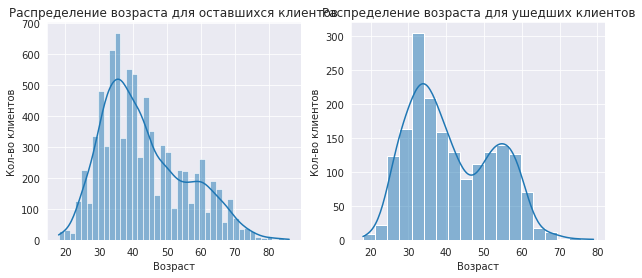

In [38]:
# подготовим выборки для проверки гипотезы
data_g2s = data.query('churn == 0')['age']
data_g2g = data.query('churn == 1')['age']
# посмотрим на распределение
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Распределение возраста для оставшихся клиентов')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Возраст')
sns.histplot(data_g2s,kde=True);

plt.subplot(1,2,2)
plt.title('Распределение возраста для ушедших клиентов')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Возраст')
sns.histplot(data_g2g,kde=True);

print('Количество ушедших =', len(data_g2g),'Количество оставшихся =',len(data_g2s))

- выборки не зависят друг от друга

- не имеют явных выбросов, распределены ненормально, но ссылаях на ЦПТ: 

  Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности.  
  Можем идти дальше

- выборки существенно отличаются размерами, поэтому считаем дисперсию разной. Воспользуемся поправкой Уэлча

-> можем применить ttest

In [39]:
# зададим уровень статистической значимости
alpha = .05
# Проверим гипотезу
results = st.ttest_ind(data_g2g, data_g2s, alternative='less',equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть гипотезу') 

p-значение: 5.860828426939773e-08
Отвергаем нулевую гипотезу


С большой вероятностью в среднем ушедшие клиенты моложе оставшихся

### Третья гипотеза
Описание: кол-во баллов собственности у оставшихся клиентов больше чем у ушедших  
H0 - кол-во баллов собственности у оставшихся клиентов >= баллов ушедших  
H1 - кол-во баллов собственности у оставшихся клиентов < чем у ушедших

Количество ушедших = 1819 Количество оставшихся = 8155


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


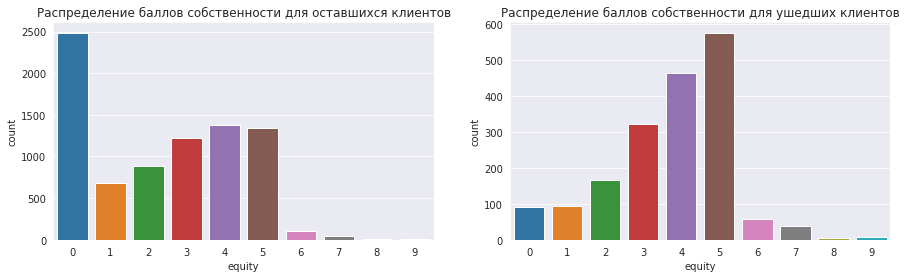

In [40]:
# подготовим выборки для проверки гипотезы
data_g3s = data.query('churn == 0')['equity']
data_g3g = data.query('churn == 1')['equity']
# посмотрим на распределение
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Распределение баллов собственности для оставшихся клиентов')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Баллы собственности')
sns.countplot(data_g3s);

plt.subplot(1,2,2)
plt.title('Распределение баллов собственности для ушедших клиентов')
plt.ylabel('Кол-во клиентов')
plt.xlabel('Баллы собственности')
sns.countplot(data_g3g);

print('Количество ушедших =', len(data_g3g),'Количество оставшихся =',len(data_g3s))

- генеральные совокупности не зависят друг от друга
- имеют явные выбросов
- за счет большого количества данных можем предположить что дисперсии рассматриваемых генеральных совокупностей равны

-> не можем применить ttest -> тест Уилкоксона-Манна-Уитни

In [41]:
# зададим уровень статистической значимости
alpha = .05
# Проверим гипотезу
results = st.mannwhitneyu(data_g3s, data_g3g, alternative='less')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-значение: 1.1200654661706555e-157
Отвергаем нулевую гипотезу


С огромной вероятностью можно сказать, что количество баллов собственности ушедних клиентов превышает количество баллов оставшихся

### Четвертая гипотеза
Описание: доход ушедших клиентов в среднем меньше чем у оставшихся  
H0 - доход ушедших >= доходу оставшихся  
H1 - доход ушедших < дохода оставшихся

Количество ушедших = 1819 Количество оставшихся = 8155


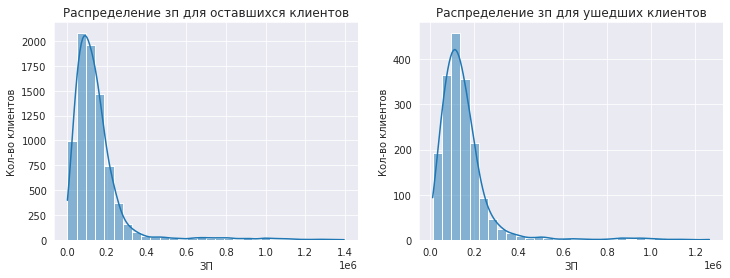

In [42]:
# подготовим выборки для проверки гипотезы
data_g4s = data.query('churn == 0')['est_salary']
data_g4g = data.query('churn == 1')['est_salary']
# посмотрим на распределение
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Распределение зп для оставшихся клиентов')
plt.ylabel('Кол-во клиентов')
plt.xlabel('ЗП')
sns.histplot(data_g4s,kde=True, bins = 30);

plt.subplot(1,2,2)
plt.title('Распределение зп для ушедших клиентов')
plt.ylabel('Кол-во клиентов')
plt.xlabel('ЗП')
sns.histplot(data_g4g,kde=True,bins = 30);

print('Количество ушедших =', len(data_g3g),'Количество оставшихся =',len(data_g3s))

Обе выборке имеют явные выбросы -> не можем воспользоваться t-тестом   
В таком случае нам подойдет непараметрический тест Уилкоксона-Манна-Уитни

In [43]:
# зададим уровень статистической значимости
alpha = .05
# # Проверим гипотезу
results = st.mannwhitneyu(data_g4g, data_g4s, alternative='less')
# выведем итоги проверки
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9999029472052035
Не отвергаем нулевую гипотезу


С огромной вероятностью можно сказать, что доход ушедних больше или равен доходу оставшихся

### Выводы по блоку 'Проверка статистических гипотез'

В ходе блока 'Проверка статистических гипотез' были проверены следующие гипотезы и сделаны выводы:
1. Баланс на счету ушедшего клиента не более 800000 рублей
    -  с высокой вероятностью баланс ушедшего клиента более 800 тыс
1. Ушедшие клиенты моложе оставшихся
    -  С большой вероятностью в среднем ушедшие клиенты моложе оставшихся
1. Кол-во баллов собственности у оставшихся клиентов больше чем у ушедших
    -  С огромной вероятностью можно сказать, что количество баллов собственности ушедних клиентов превышает количество баллов оставшихся
1. Доход ушедших клиентов в среднем меньше чем у оставшихся
    -  С огромной вероятностью можно сказать, что доход ушедних больше или равен доходу оставшихся

## Подвередение промежуточных итогов
    - выводы по результатам корреляционного анализа
    - выводы по результатам EDA
    - выводы на основе проверки гипотез
    - выделение признаков, влияющих на отток

### Выводы по результатам корреляционного анализа

Сделаем выводы из анализа матрицы корреляции:  
Отток имеет следующую корреляцию(по шкале Чеддока) 

__Слабая корреляция__
-  с количеством баллов собственности(0.4)
-  с количеством продуктов банка(0.4)
-  со статусом активности(0.3)

__Очень слабая корреляция__
- рейтинг банковского скоринга(0.2)
- пол (0.2)
- возраст (0.2)
- наличие кредитной карты (0.2)
- зарплата(0.05)
- город (0.02)
- баланс (0.02)

В целом, отток довольно плохо коррелируется с остальными параметрами, но лучше остальных это получилось у группы слабой корреляции

Так как матрица была построенна с использованием библиотеки phik, явно нельзя сказать положительная или отрицательная корреляция между признаками и оттокам. Перейдем к дальнейшему анализу

### Выводы по результатам EDA

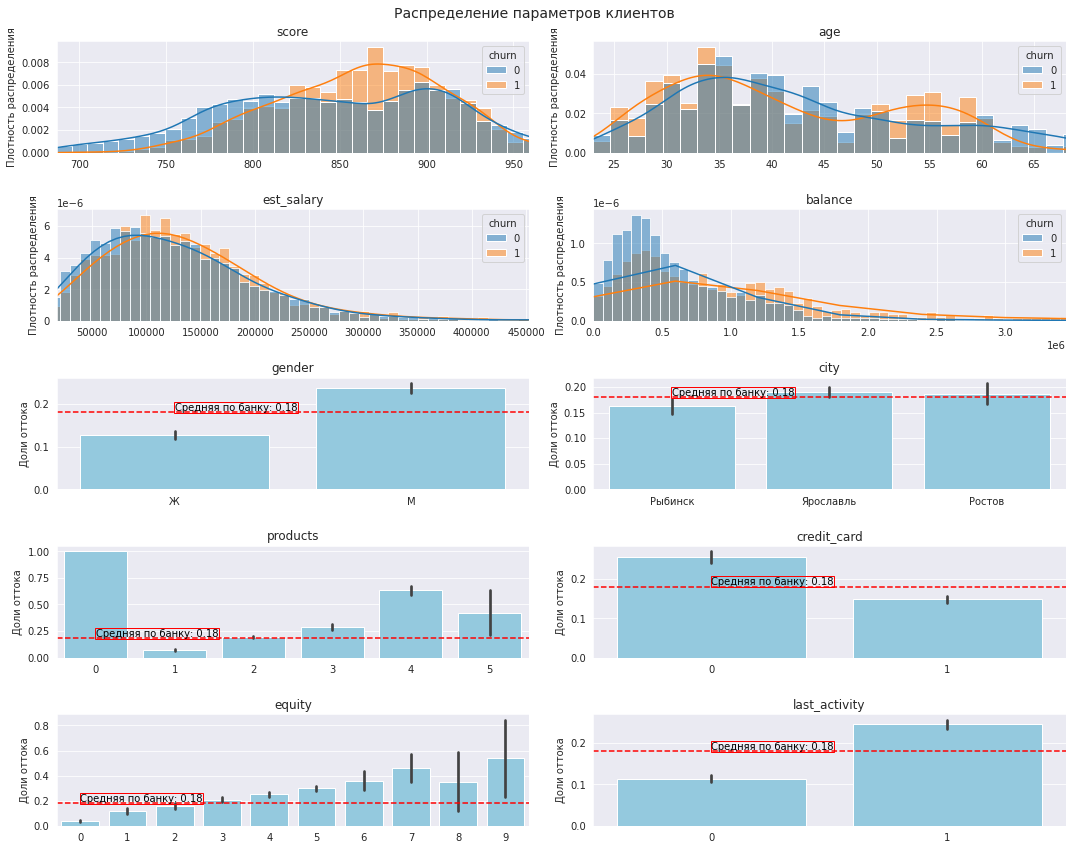

In [44]:
rasp_val('Распределение параметров клиентов ',data_new,gr=False)

В результате исследовательского анализа были выявлены интервалы для параметров, в которых преобладают отток клиентов. Рассмотрим их чуть ближе:  
<u>__Рейтинг кредитного скоринга__</u>  
Данный рейтинг довольно просто интерпретировать: чем он больше - тем более надежный и богатый клиент, и тем больше средств он готов доверить банку и банк готов доверить ему. Проблемный интервал тут находится на вершине рейтинга - __из банка уходят богатые и надежные клиенты__  

<u>__Возраст__</u> 
Данный параметр имеет 2 ярко выраженных интервала оттока  
__Первый такой интервал это молодежь 25-35 лет__, самые активная часть экономики любой страны и сферы. Такие люди чаще всего берут крудиты на жилье и другие крупные покупки  
__Второй интервал - люди старшего возраста 55-60 лет__. Они уже состоялись в жизни, чаще других имеют большие сбережения.

<u>__Пол__</u>  
__Мужчина в 2 раза чаще женщин__ подвержены оттоку. Возможно, это связано с текущем неравенством зарплат и вытекающей отсюда невозможностью вести активную экономическую жизнь

<u>__Баланс__</u>  
Отток начинается, когда __баланс превышает отметку в 800-900 тыс__. Возможно, есть проблема в программах вклада, люди хотят получать больше со своих свободных денег  

<u>__Уровень предполагаемой зарплаты__</u>  
Ярко выраженным __интервалом оттока в уровне зарплаты является значения от 100 до 250 тыс__. Эти значения обычно пренаджежат довольно активному и ценному среднему классу

<u>__Продукты__</u>  
Удивительно, но данные показывают, что чем __большим количеством продуктов банка пользуется клиент, то тем больше вероятность его оттока__. Возможно это также говорит о том, что активные участники экономики(средний класс) в какой то момент чувствуют, что могут найти банк и лучше  

<u>__Кредитная карта__</u>  
__Отсутствие кредитной карты делает отток более привлекательным__ нежели если бы она была. Также необходимо заметить, что по условиям проекта только кредитная карта дает доступ к кредитам.

<u>__Количество баллов собственности__</u>  
Величина похожая по сути на рейтинг кредитного скоринга: чем она больше - тем большим количеством собственности владеет клиент, тем он богаче. И также как и с рейтингом, начиная с 3 баллов отток явно выражен.  

<u>__Активность__</u>
И как вишенка на торте, в подтверждение предыдущим выводам - из банка уходят __именно активные клиенты__

Построение портрета пользователя
   - таблица портрета включает в себя 5 стобца с 4 портретами оттока(признаки в названиях группы) и 1 полностью лояльным портретом 
    
Выводы по портретам:
- __products = 0__  
    Отток в данной группе связан со смертью клиента. 
    
    
- __products >=2__  
    Это люди среднего достатка, владеющими собственностью и пользуюшиеся продуктами банка в большем количестве относительно лояльных клиентов. Есть вероятность, что их __не устраивает именно качество или наполненность продуктов.__


- __equity >=4__  
    Крупные владельцы собственности, с внушительным балансом на счету. Имеют самый большой процент оттока среди всех групп. Можно предположить, что __не устраивают условия связанные с вкладами или страхованием собственности__
    
    
- __last_activity = 1__  
    Супер активные клиенты с чуть большим относительно лояльных балансом. Чаще всего контактируют с продуктами банка, возможно __не устраивает качество обслуживания__

### Выводы на основе проверки гипотез

При проверке гипотез предположение, о том что из банка уходят обеспеченные(как в плане баланса, так и дохода), порой молодые, владеющие не меньшим, а то и большим количеством собственности клиенты при проверке гипотез только подтвердилось.

### Выделение признаков, влияющих на отток

Для дальнейшей сегментации и рекомендации на основе анализа были выявлены основные признаки оттока:
- количество баллов собственности (equity)
- зарплата (est_salary)
- активность (last_activity)
- количество продуктов банка(products)

## Сегментация клиентов
    - стандартизация данных
    - обоснование 
        - количества кластеров
        - для инструмента кластеризации
        - метрики кластеризации
        - критерия кластеризации
    -  кластеризация данных
    - анализ кластеров
        - визуализация распределения параметров 
        - вывод средних значений      
    - пример применения кластеризации для новых клентов банка

### Стандартизация данных

In [45]:
# Создаем датасет из вышеописанных признаков, выбранных для сегментации
data_sg = data[['est_salary','equity','last_activity','products']]

In [46]:
# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(data_sg)

Данные стандартизированы!

### Обоснование для инструментов машинного обучения

#### Инструмента кластеризации
В качестве инструмента кластеризации будем использовать алгоритм KMeans. Он позволяет разделять данные на отдельные кластеры за меньшее среди аналогов время.  
Сложностью является необходимость до кластеризации знать оптимальное количество кластеров. Но эту задачу мы решим с помощью метода силуэта в следующем шаге.

#### Количество кластеров
Для обоснования количества числа кластеров воспользуемся значением силуэта

In [47]:
no_of_clusters = [n for n in range(2,16)] 
sil_list = []
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters,n_init = 10,random_state=0) 
    cluster_labels = cluster.fit_predict(X) 
 
    silhouette_avg = silhouette_score(X, cluster_labels) 
    sil_list.append(silhouette_avg)


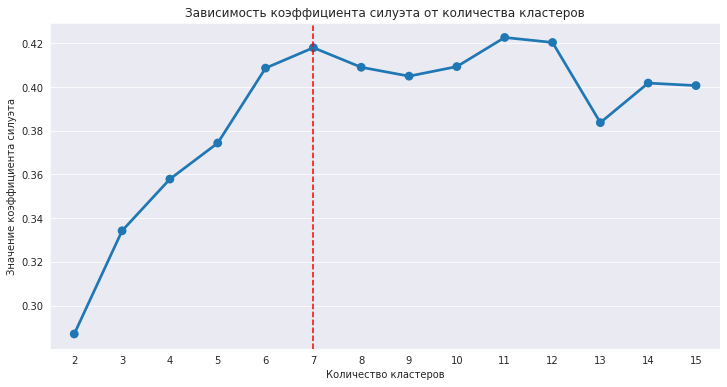

In [48]:
plt.figure(figsize=(12,6))
plt.title('Зависимость коэффициента силуэта от количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение коэффициента силуэта')
sns.pointplot(x=no_of_clusters,y=sil_list)
plt.axvline(5,color='r',ls='--');

Значение коэффициента максимально(локально) при значении числа кластеров = 7

#### Метрики кластеризации
В качестве метрики кластеризации воспользуемся оценкой по индексу Дэвиса-Булдина

    Оценка по индексу Дэвиса-Булдина определяется как средний показатель сходства каждого кластера с наиболее похожим кластером, где сходство представляет собой отношение расстояний внутри кластера к расстояниям между кластерами. Таким образом, кластеры, расположенные дальше друг от друга и менее рассредоточенные, получат лучший результат. Минимальный балл равен 0, меньшие значения указывают на лучшую кластеризацию.
А также оценкой поо индексу Калински–Харабаша

    Индекс Калински–Харабаша определяется как отношение межкластерного разделения к внутрикластерной дисперсии,         нормированное по количеству степеней свободы. Высокое значение индекса указывает на более чётко определённые кластеры

#### Критерий класстеризации  
По условию проекта критерием удачной кластеризации будет являтся минимальный размер каждого кластера минимум в 500 клиентов, причем не менее 3 из них должны иметь уровень оттока выше среднего по банку

### Кластеризация данных

Исходные данные для кластеризации:
- Количество кластеров = 7
- Алгоритм кластеризации KMeans
- Метрика: оценка по индексу Дэвиса-Булдина, Калински-Харабаша
- Критерий кластеризации: минимум в 500 клиентов для каждого кластера и минимум 3 кластера с уровенем оттока выше среднего по банку

In [49]:
# Кластеризируем данные 
cluster = KMeans(n_clusters = 7,n_init = 10,random_state=42) 
cluster_labels = cluster.fit_predict(X)

In [50]:
# Расчетываем метрики
db_index = davies_bouldin_score(X, cluster_labels)
ch_index = calinski_harabasz_score(X, cluster_labels)
sl_index = silhouette_score(X, cluster_labels)
# Выводим
print(f"Индекс Дэвиса-Боулдина: {db_index:.2f}")
print(f"Индекс Калински-Харабаша: {ch_index:.2f}")
print(f"Оценка силуэта:{sl_index:.2f}")

Индекс Дэвиса-Боулдина: 0.90
Индекс Калински-Харабаша: 5134.63
Оценка силуэта:0.42


- Индекс Девида-Боулдина средне-высокий(что не очень хорошо для нашей кластеризации, предполагает довольно сильное разделение) между кластерами  
- Индекс Калински-Харабаша довольно высок(кластеры различимы и независемы)  
- Оценка силуэта имеет среднее значение(кластеры различимы, но можно и лучше)

In [51]:
# модифицируем исходный датасет, добавив столбец label с номером кластера
data02 = data.copy()
data02['label'] = cluster_labels
# разделим исходный датасет на кластеры
data_0 = data02.query('label == 0')
data_1 = data02.query('label == 1')
data_2 = data02.query('label == 2')
data_3 = data02.query('label == 3')
data_4 = data02.query('label == 4')
data_5 = data02.query('label == 5')
data_6 = data02.query('label == 6')

# проверим размеры кластеров и процент оттока
list_cls = [data_0,data_1,data_2,data_3,data_4,data_5,data_6]
for i,df in enumerate(list_cls):
    
    print(i,len(df),round(df['churn'].sum()/df['churn'].count(),2))

0 2449 0.1
1 1728 0.06
2 2537 0.3
3 248 0.12
4 1501 0.05
5 702 0.3
6 809 0.47


Один из 7 сегментов меньше 500 человек, но так как его процент оттока ниже среднебанковского,и на его основе мы не будем давать рекомендации, то будет считать сегментацию успешной

### Анализ кластеров

#### Визуализация распределений

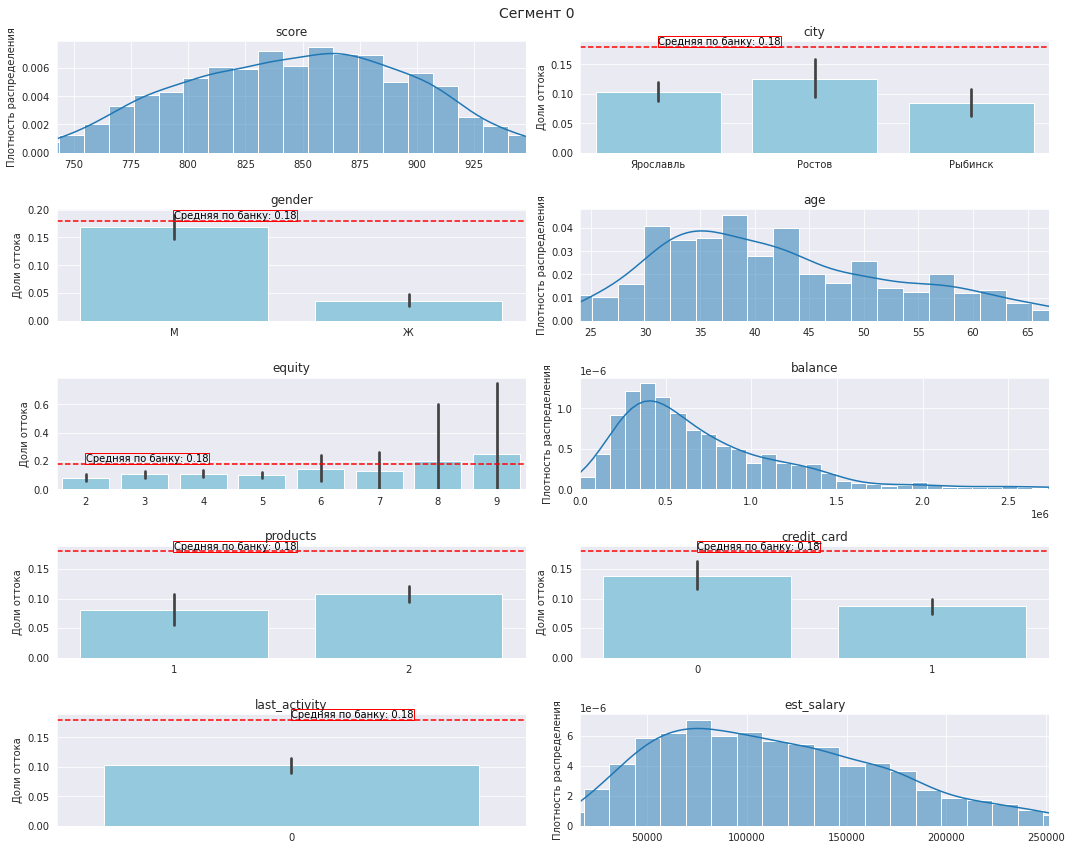

In [52]:
# визуализация распределения параметров
rasp_val('Сегмент 0',data_0,hue=None,gr=False);

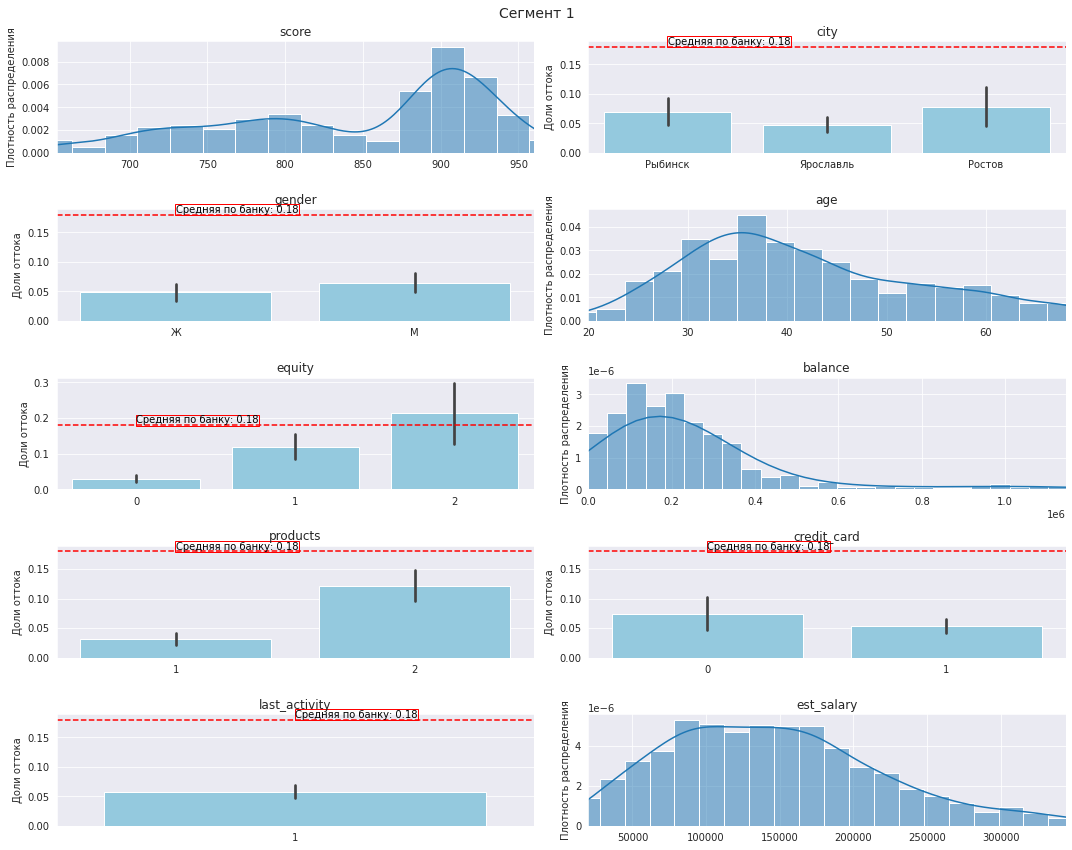

In [53]:
# визуализация распределения параметров
rasp_val('Сегмент 1',data_1,hue=None,gr=False);

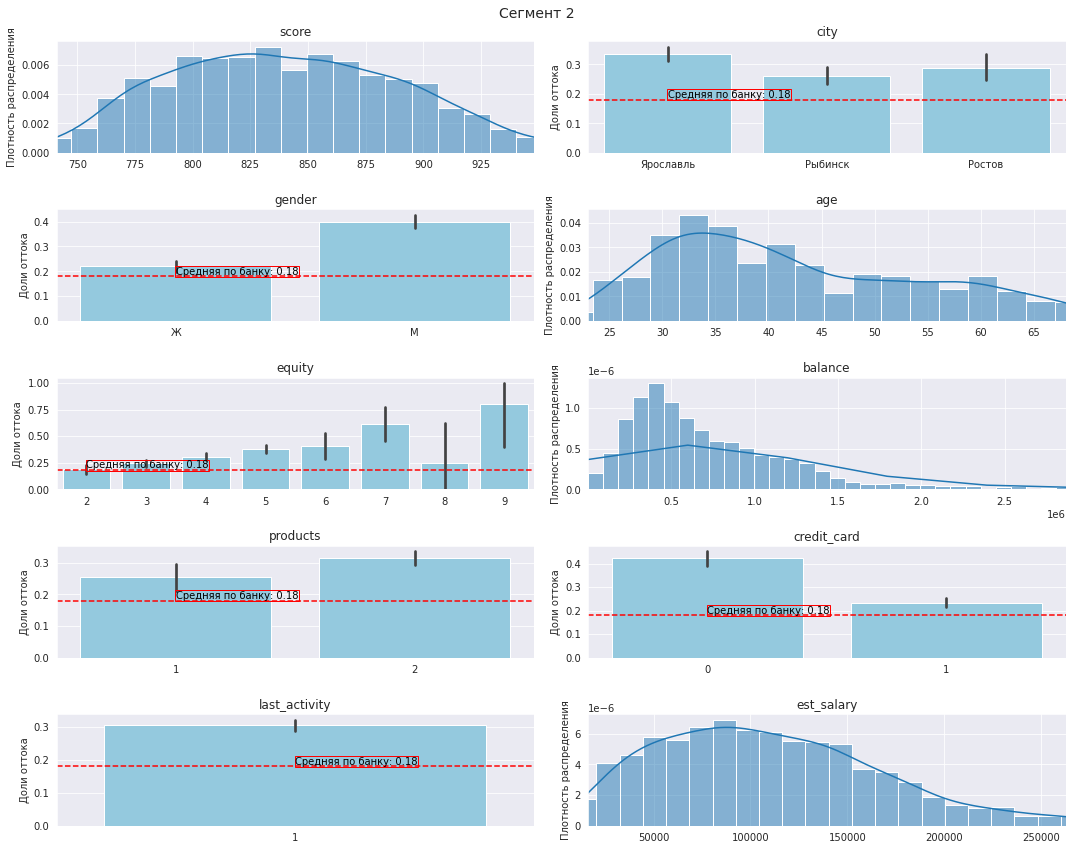

In [54]:
# визуализация распределения параметров
rasp_val('Сегмент 2',data_2,hue=None,gr=False);

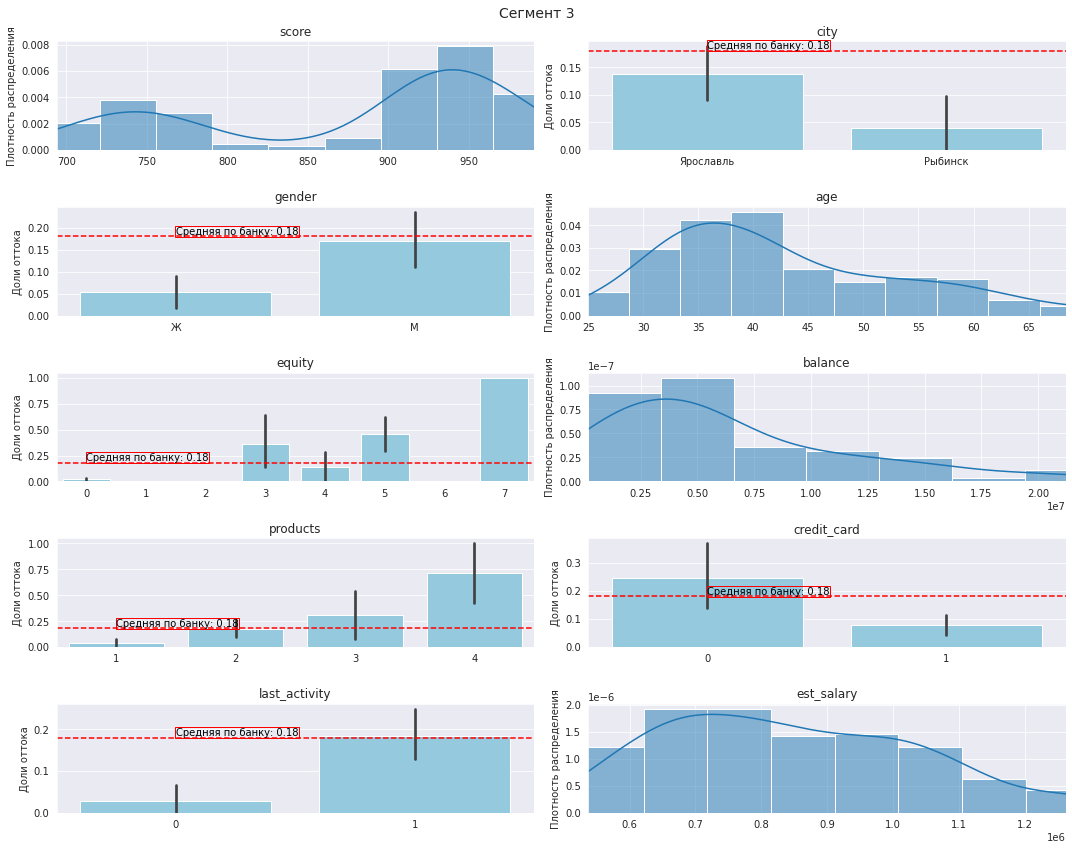

In [55]:
# визуализация распределения параметров
rasp_val('Сегмент 3',data_3,hue=None,gr=False);

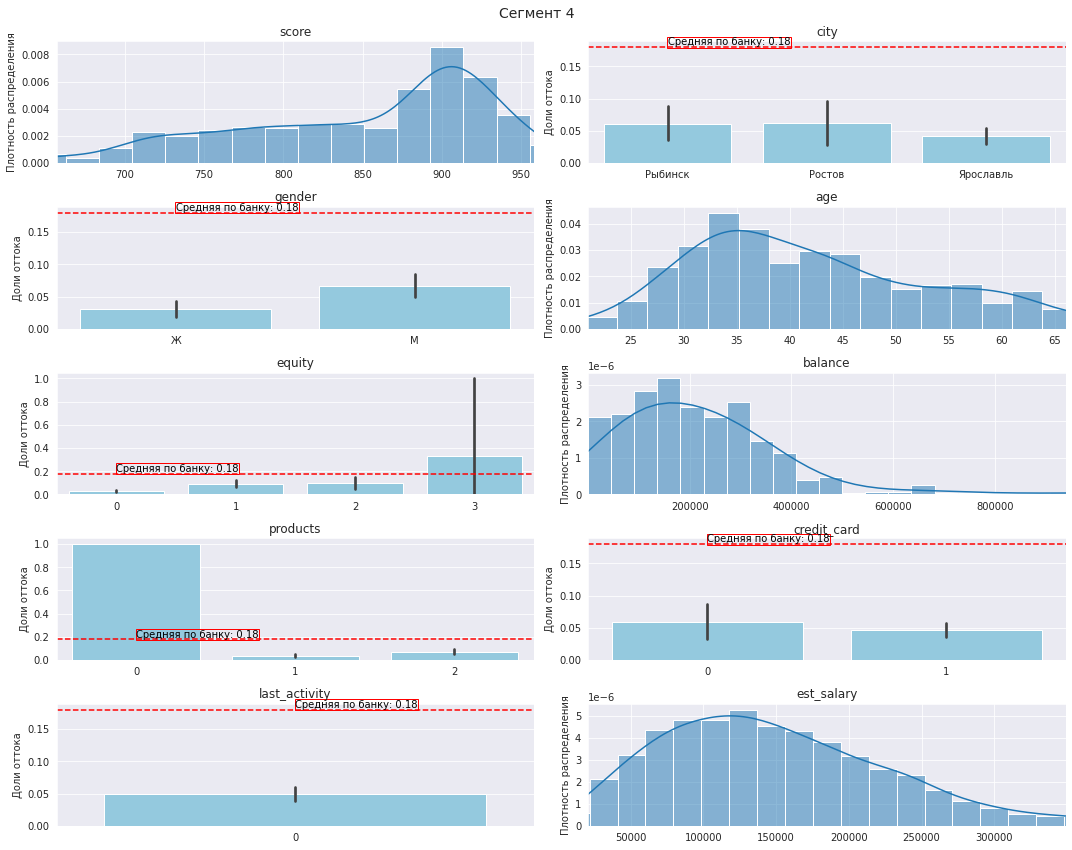

In [56]:
rasp_val('Сегмент 4',data_4,hue=None,gr=False);

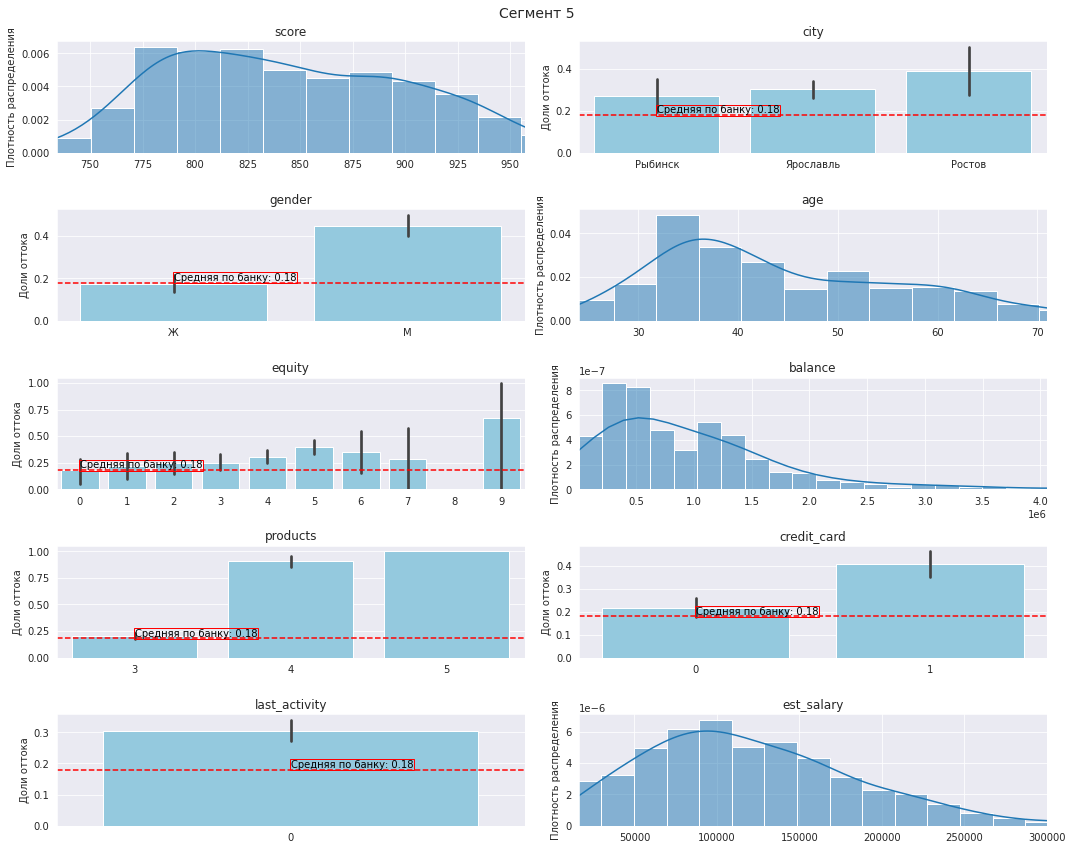

In [57]:
rasp_val('Сегмент 5',data_5,hue=None,gr=False);

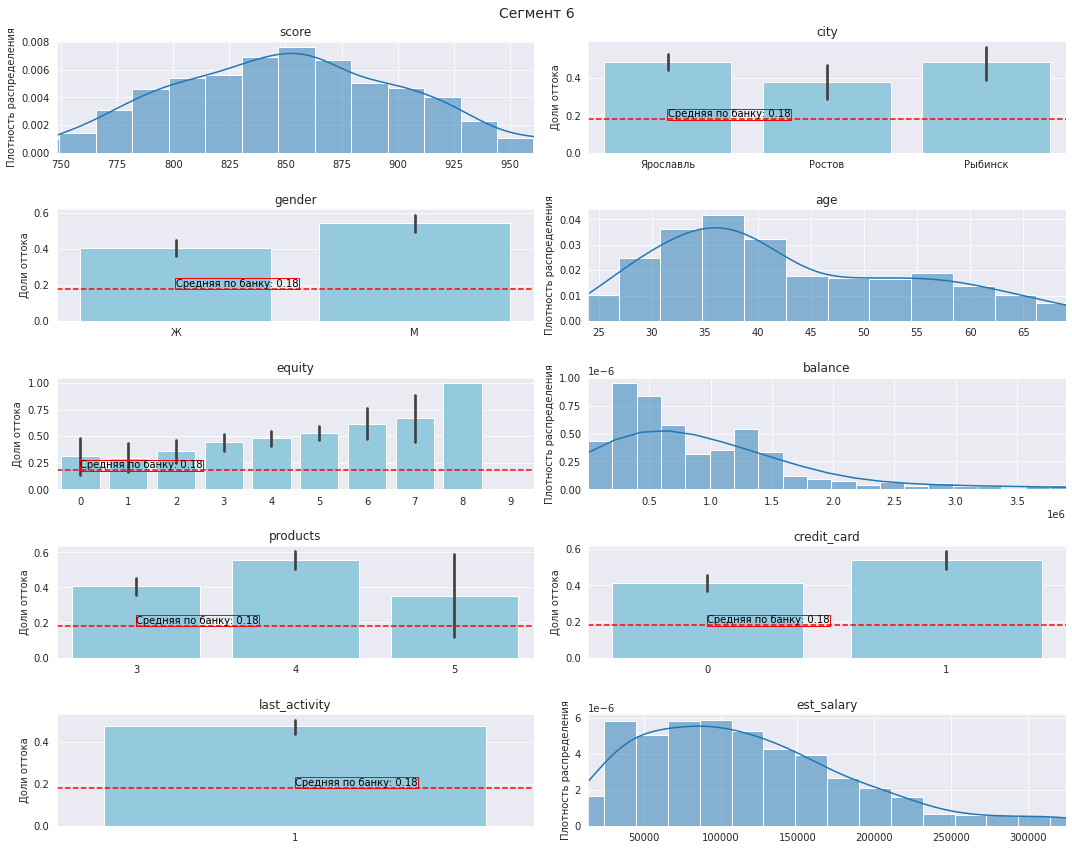

In [58]:
rasp_val('Сегмент 6',data_6,hue=None,gr=False);

#### Создание портретов

In [59]:
# подготовим данные для создания портретов

data_pt0,data_pt0_bot = port('Сегмент 0',data=data_0)
data_pt1,data_pt1_bot = port('Сегмент 1',data=data_1)
data_pt2,data_pt2_bot = port('Сегмент 2',data=data_2)
data_pt3,data_pt3_bot = port('Сегмент 3',data=data_3)
data_pt4,data_pt4_bot = port('Сегмент 4',data=data_4)
data_pt5,data_pt5_bot = port('Сегмент 5',data=data_5)
data_pt6,data_pt6_bot = port('Сегмент 6',data=data_6)



data_grport_seg = mer(data_pt0,[data_pt1,data_pt2,data_pt3,data_pt4,data_pt5,data_pt6]).round(2)
data_grport_bot_seg = mer(data_pt0_bot,[data_pt1_bot,data_pt2_bot,data_pt3_bot, \
                                        data_pt4_bot,data_pt5_bot,data_pt6_bot])

In [60]:
# создание портрета
data_grport_fin = (pd.concat([data_grport_seg, data_grport_bot_seg]))
data_grport_fin = data_grport_fin.drop(['медиана churn','среднее label','медиана label'])

In [61]:
data_grport_fin

,Сегмент 0,Сегмент 1,Сегмент 2,Сегмент 3,Сегмент 4,Сегмент 5,Сегмент 6
среднее score,850.07,847.93,842.54,876.97,852.08,845.16,853.42
медиана score,851.0,885.0,839.0,920.0,880.0,839.0,852.0
среднее age,42.72,42.05,42.81,43.09,42.28,44.44,43.23
медиана age,41.0,40.0,40.0,40.0,40.0,41.0,40.0
среднее equity,3.81,0.31,3.89,1.38,0.37,3.6,3.82
медиана equity,4.0,0.0,4.0,0.0,0.0,4.0,4.0
среднее balance,758045.81,269752.6,853296.71,6548925.29,240994.36,1038538.28,1035722.82
медиана balance,572237.2,193316.08,596622.61,4711150.54,195513.43,766098.08,692326.43
среднее products,1.81,1.29,1.82,1.51,1.3,3.15,3.5
медиана products,2.0,1.0,2.0,1.0,1.0,3.0,3.0


Во ВСЕХ сегментах значения рейтинга кредитного скоринга и возраста примерно одинаковы, не будем акцентировать внимание и удалим их из таблицы средних

In [62]:
data_grport_fin = data_grport_fin.drop(['медиана score','среднее score','медиана age','среднее age'])

In [63]:
data_grport_fin

,Сегмент 0,Сегмент 1,Сегмент 2,Сегмент 3,Сегмент 4,Сегмент 5,Сегмент 6
среднее equity,3.81,0.31,3.89,1.38,0.37,3.6,3.82
медиана equity,4.0,0.0,4.0,0.0,0.0,4.0,4.0
среднее balance,758045.81,269752.6,853296.71,6548925.29,240994.36,1038538.28,1035722.82
медиана balance,572237.2,193316.08,596622.61,4711150.54,195513.43,766098.08,692326.43
среднее products,1.81,1.29,1.82,1.51,1.3,3.15,3.5
медиана products,2.0,1.0,2.0,1.0,1.0,3.0,3.0
среднее credit_card,0.7,0.8,0.63,0.77,0.8,0.46,0.46
медиана credit_card,1.0,1.0,1.0,1.0,1.0,0.0,0.0
среднее last_activity,0.0,1.0,1.0,0.57,0.0,0.0,1.0
медиана last_activity,0.0,1.0,1.0,1.0,0.0,0.0,1.0


Основные особенности  отточных сегментов:

- __Сегмент 6__
    - большое количество баллов собственности >= 4
    - большой баланс > 700 тыс
    - большое количество продуктов >= 3
    - среднее использование кредитной карты
    - Активные (last_activity =1)
    - Чаще женщины из Ярославля
    - Самая большая доля оттока
    
    
- __Сегмент 2__
    - большое количество баллов собственности >= 4
    - средний баланс > 600
    - среднее количество продуктов >=2
    - средневысокое использование кредитной карты
    - Активные (last_activity =1)
    - Чаще женщины из Ярославля
    - доля оттока = 0.3
    
    
- __Сегмент 5__
    - большое количество баллов собственности >= 4
    - большой баланс >750 тыс
    - большое количество продуктов >= 3
    - среднее использование кредитной карты
    - Неактивные(last_activity =0)
    - Чаще женщины из Ярославля
    

### Выводы по блоку 'Сегментация'

По итогам сегментации было сформировано 7 различных групп, 3 из которых оказались отточными. Охарактеризуем отточные:

- __Сегмент 6__  
   - Активные клиенты с довольно большим балансом на счету, большим количестовм собственности и количеством продуктов, не так часто пользуются кредитами.   
    
   - __Возможная проблема__ состоит в недостаточно удобном пользовании банковскими услугами, так как эти пользователи части с ними контактируют
    
    
- __Сегмент 2__  
    - Активные клиенты с среднебольшим балансом на счету, большим количеством собственности и среднем количеством продуктов банка, чаще остальных прибегают к кредитам.  
    
    - __Возможная проблема__ состоит в неудобном процессе кредитования, либо неподходящие условия использования кредитной картой
    
    
- __Сегмент 5__  
   - Неактивные клиенты с довольно большим балансом на счету, большим количеством продуктов и собственности, не так часто прибегают к кредитам.
    
   - __Возможная проблема__ состоит в невыгодных или неудобных условиях вклада денежных средств
    

## Приоритизация сегментов

Удалим из таблицы портретов неотточные сегменты. 
Приоритизируем сегменты по доли оттока в них

In [64]:
data_grport_fin = data_grport_fin.drop(['Сегмент 3','Сегмент 0','Сегмент 1','Сегмент 4'],axis=1)
# также отсортируем сегменты в порядке уменьшения доли оттока
data_grport_fin = data_grport_fin.T.sort_values(by='среднее churn', ascending=False).T

In [65]:
# Выводим конечный результат
data_grport_fin

,Сегмент 6,Сегмент 2,Сегмент 5
среднее equity,3.82,3.89,3.6
медиана equity,4.0,4.0,4.0
среднее balance,1035722.82,853296.71,1038538.28
медиана balance,692326.43,596622.61,766098.08
среднее products,3.5,1.82,3.15
медиана products,3.0,2.0,3.0
среднее credit_card,0.46,0.63,0.46
медиана credit_card,0.0,1.0,0.0
среднее last_activity,1.0,1.0,0.0
медиана last_activity,1.0,1.0,0.0


## Выводы и рекомендации

В ходе данного проекта были решены следующие задачи
1. __Загрузка данных__  
    - были подключены необходимые библиотеки
        - библиотека phik устанавливается отдельно
    - загружены исходные данные для дальнейшей работы
    
    
2. __Предоботка данных__
    - выведена общей информации о датасете
        - уточнены условия для выпольнения дальнейших задач предобработки
    - преведены названий столбцов к одному стилю
    - заполнены пропусков
        - часть пропусков удалена
        - часть пропусков оставлена как не случайные
    - преведен типы столбцов к более походящим
        - типы столбцов age и score заменены на int
    - проверка на дубликаты
        - были найдены и преобразованы строки с неявными дубликатами в user_id
        
        
3. __EDA__        
    - построена корреляционная матрица  
        - Отток имеет следующую корреляцию(по шкале Чеддока)  
            __Слабая корреляция__
            -  с количеством баллов собственности(0.4)
            -  с количеством продуктов банка(0.4)
            -  со статусом активности(0.3)
***
   - анализ распределения параметров клиентов в разрезе параметра оттока
       -  были определены интевалы оттока
           1. __Кредитный рейтинг(score):__  
                - с 820 до 930 заметен явный перевес оттока
           2. __Возраст (age):__
                - c 25 до 35
                - с 50 до 60
           3. __Пол(gender):__
                - Чаще уходят мужчины(но этот показатель имеет минимальную важность)
           4. __Баланс(balance):__
                - c 800 тыс
           5. __Уровень предпологаемой зп(est_salary):__
                - со 100 тыс
           6. __Город(city):__
                - Нет определенного лидера в оттоке
           7. __Количество продуктов (products):__
                - менее 1
                - начиная с 2 и более
           8. __Наличие кредитной карты (credit_card):__
                - чаще уходят клиенты без нее
           9. __Количество баллов собственности(equity):__
                - начиная с 4
           10. __Активность клиента(last_activity):__
                - активные клиенты уходят чаще
***
   - построение портрета клиента   
        - таблица портрета включает в себя 5 стобца с 4 портретами оттока(признаки в названиях группы) и 1 полностью лояльным портретом   
            - __products = 0__  
               - Отток в данной группе связан со смертью клиента. 
            - __products >=2__  
               -  Это люди среднего достатка, владеющими собственностью и пользуюшиеся продуктами банка в большем количестве относительно лояльных клиентов. Есть вероятность, что их __не устраивает именно качество или наполненность продуктов.__
            - __equity >=4__  
               - Крупные владельцы собственности, с внушительным балансом на счету. Имеют самый большой процент оттока среди всех групп. Можно предположить, что __не устраивают условия связанные с вкладами или страхованием собственности__
            - __last_activity = 1__  
               - Супер активные клиенты с чуть большим относительно лояльных балансом. Чаще всего контактируют с продуктами банка, возможно __не устраивает качество обслуживания__
        
        
4. __Проверка статистических гипотез__  
    В ходе блока 'Проверка статистических гипотез' были проверены следующие гипотезы и сделаны выводы:
    - Баланс на счету ушедшего клиента не более 800000 рублей
        -  с высокой вероятностью баланс ушедшего клиента более 800 тыс
    - Ушедшие клиенты моложе оставшихся
        -  С большой вероятностью в среднем ушедшие клиенты моложе оставшихся
    - Кол-во баллов собственности у оставшихся клиентов больше чем у ушедших
        -  С огромной вероятностью можно сказать, что количество баллов собственности ушедних клиентов превышает количество баллов оставшихся
    - Доход ушедших клиентов в среднем меньше чем у оставшихся
        -  С огромной вероятностью можно сказать, что доход ушедних больше или равен доходу оставшихся
        
        
5. __Подвередение промежуточных итогов__
    - выводы по результатам корреляционного анализа
    - выводы по результатам EDA
    - выводы на основе проверки гипотез
    - выделение признаков, влияющих на отток
        - Для дальгнейшей сегментации и рекомендации на основе анализа были выявлены основные признаки оттока:
            - Количество баллов собственности (equity)
            - зарплата (est_salary)
            - активность (last_activity)
            - количество продуктов банка(products)
            
            
6.  __Сегментация клиентов__
    - стандартизация данных
        - стандартизировали данные с помощью StandardScaler
    - обоснование 
        - количества кластеров
            - оценка значения силуэта
        - для инструмента кластеризации
            - KMeans за его быстроту
        - метрики кластеризации
            - оценкой по индексу Дэвиса-Булдина и по индексу Калински–Харабаша
        - критерия кластеризации
            - в каждом сегменте не менее 500 человек
    - кластеризация данных
        - данные были разделены на 7 различных кластеров
    - анализ кластеров
        - визуализация распределения параметров
        - создание портретов

            
7. __Приоритизация сегментов__  
    Приоритизируем сегменты по  уменьшению доли оттока в них
    
<u>__Выводы:__</u>

На основе сегментации было сформировано 3 отточных сегмента. Опишем их и дадим рекомендации по каждому индивидуально

- __Сегмент 6 - Активные и без кредитов__  
   - Активные клиенты с довольно большим балансом на счету, большим количестовм собственности и количеством продуктов, не так часто пользуются кредитами.   
    
   - __Возможная проблема__ состоит в недостаточно удобном пользовании банковскими услугами, так как эти пользователи части с ними контактируют
    
    
- __Сегмент 2 - Активные и с кредитом__  
    - Активные клиенты с среднебольшим балансом на счету, большим количеством собственности и среднем количеством продуктов банка, чаще остальных прибегают к кредитам.  
    
    - __Возможная проблема__ состоит в неудобном процессе кредитования, либо неподходящие условия использования кредитной картой
    
    
- __Сегмент 5 - Неактивные и без кредита__  
   - Неактивные клиенты с довольно большим балансом на счету, большим количеством продуктов и собственности, не так часто прибегают к кредитам.
    
   - __Возможная проблема__ состоит в невыгодных или неудобных условиях вклада денежных средств

<u>__Рекомендации:__</u>

- __Сегмент 6 - Активные и без кредитов__  
    Так как их проблема состоит в неудобстве пользования продуктами банка, которыми они довольно часто пользуются, необходимо предложить им альтернативу в качестве обслуживания - возможно что то типо сервиса вип по подписке, благодаря которому клиентам не нужно будет часто сталкиваться с некачественным сервисом. Возможно прекрепление персонального менеджера, специальный личный кабинет в приложении банка с расширенным функционалом или программа лояльности для активных клиентов.  
    
    
- __Сегмент 2 - Активные и с кредитом__  
    Данная группа клиентов довольно часто пользуется кредитами и кредитными картами. Для ее удержания необходимо улучшить условия для самой кредитной карты(увелить беспроцентный период), а также стоит найти партнеров, при оплате у которых именно кредитной картой пользователь будет получать бонусы. Возможно также стоит создать новые дизайны для карт, а также сделать различные кредитки с различными условиями для покрытия как можно больших потрнебностей клиентов


- __Сегмент 5 - Неактивные и без кредита__  
    Такой группе клиентов не приходится часто сталкиваться с сервисом в банке, они пользуются долгоиграющими продуктами - вкладами и страховками. Для этой группы возможным решением проблемы будет также пересмотр условий вклада - возможно введение прогрессирующего процента(на первых этапах вклада человек будет получать меньше денег, но с увеличением времени вклада процент будет немного рости). Также стоит предложить различные условия для страхования.
